# How to create Data objects

The SciDataTool python module has been created to **ease the handling of scientific data**, and considerately simplify plot commands. It unifies the extraction of relevant data (e.g. slices), whether they are stored in the time/space or in the frequency domain. The call to Fourier Transform functions is **transparent**, although it still can be parameterized through the use of a dictionary.

This tutorial explains the **structure** of the `Data` classes, then shows **how to create axes and fields objects**.

The following example demonstrates the syntax to **quickly create a 1D data field** depending on time:

In [1]:
# import SciDataTool objects
from SciDataTool import Data1D, DataLinspace, DataPattern, DataTime, DataFreq, VectorField
import scipy.io
import numpy as np

time = np.linspace(0,10,10,endpoint=False)
Time = Data1D(
    name="time",
    unit="s",
    values=time,
)
print(Time.get_values())

field = np.ones(10)
Field = DataTime(
    name="Example field",
    symbol="X",
    unit="dimless",
    axes=[Time],
    values=field,
)

EMF_measured1 = scipy.io.loadmat('Z:/HDEV/Test_Measured_Data/EMF/get_data/오실로 역기전력 데이터/BEMF_raw.mat')

EMF_measure = DataTime(
    name="Example field",
    symbol="X",
    unit="dimless",
    axes=[Time],
    values=field,
)


IndentationError: unindent does not match any outer indentation level (plot_2D_Data_Animated.py, line 246)

In [ ]:
import scipy.io
import matplotlib.pyplot as plt

B_emf_ph=scipy.io.loadmat('Z:/01_Codes_Projects/Testdata_post/BEMF_yhy.mat')
EMF_measured1 = scipy.io.loadmat('Z:/HDEV/Test_Measured_Data/EMF/get_data/오실로 역기전력 데이터/BEMF_raw.mat')
N_meas=len( EMF_measured1['TrigTime'])
print(N_meas)

2500002


Your `Data`objects have been successfully created. Other features of the `SciDataTool` package are also available:
- reduce storage if an axis is regularly spaced
- reduce storage if the field presents a symmetry along one of its axes
- store a field in the frequency domain
- specifiy normalizations

These functionalities are described in the following sections.

## 1. Data class structure
The `Data` class is composed of:
- classes describing **axes**: `Data1D`, or `DataLinspace` if the axis is regularly spaced (see [section 2](#How-to-reduce-storage-if-an-axis-is-regularly-spaced))
- classes describing **fields** stored in the time/space domain (`DataTime`) or in the frequential domain (`DataFreq`)

The following UML summarizes this structure:

<div>
<img src="_static/UML_Data_Object.png" width="450"/>
</div>

The attributes in red are **mandatory**, those in gray are **optional**. To correctly fill the mandatory attributes, it is advised to follow these principles:
- `values` is a **numpy array**
- `axes` is a **list** of `Data1D` or `DataLinspace`
- `name` is **string** corresponding to a short description of the field, or the 
- `symbol` is a **string** giving the symbol of the field in LaTeX format
- `unit` is a **string** among the list: `[dimless, m, rad, °, g, s, min, h, Hz, rpm, degC, A, J, W, N, C, T, G, V, F, H, Ohm, At, Wb, Mx]`, with a prefix `[k, h, da, d, c, m, etc.]`. Composed units are also available (e.g. `mm/s^2`). It is best to use such a LaTeX formatting for axis labelling. Other units can be added in [conversions.py](https://github.com/Eomys/SciDataTool/blob/master/Functions/conversions.py).
- for `Data1D` and `DataLinspace`, `name` + `[unit]` can be used to label axes
- for `DataTime` and `DataFreq`, `name` can be used as plot title, and `symbol` + `[unit]` as label

When a `Data1D` is created, the array `values` is **squeezed** to avoid dimension problems. When a `DataTime` or `DataFreq` is created, `values` is also squeezed, and a `CheckDimError` is raised if **dimensions** of `axes` and `values` do not match.

The following sections explain how to use the optional attributes to optimize storage.

0.01


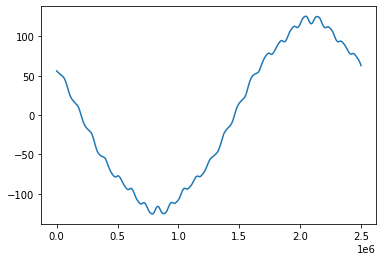

In [4]:
from scipy.interpolate import splrep, splev

rpm=1000
Np=12
fre=rpm/60*Np/2
Single_elec_period_Time=1/fre
print(Single_elec_period_Time)
type(Single_elec_period_Time)
B_emf_ph=scipy.io.loadmat('Z:\HDEV\Test_Measured_Data\EMF\get_data\오실로 역기전력 데이터\BEMF_motorcad.mat')
B_emf_ph_3f=np.transpose(B_emf_ph['B_emf_ph_3f'])

time = np.linspace(0,Single_elec_period_Time,120)


spl=splrep(time,B_emf_ph_3f)

time_int = np.linspace(0,Single_elec_period_Time,N_meas)
y1=splev(time_int,spl)


plt.plot(y1)



In [5]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

a,v =find_nearest(y1,0)
a


199979

0.01


C:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan\lib\site-packages\scidatatool-1.4.25-py3.8.egg\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


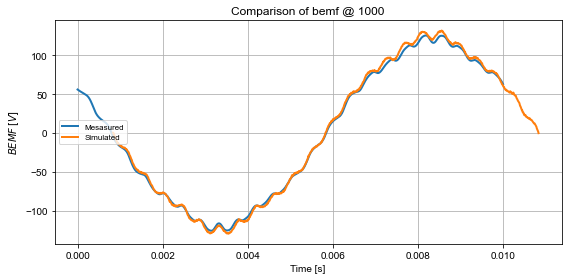

In [118]:
import scipy.io
import matplotlib.pyplot as plt

rpm=1000
Np=12
fre=rpm/60*Np/2
Single_elec_period_Time=1/fre
print(Single_elec_period_Time)
type(Single_elec_period_Time)
B_emf_ph=scipy.io.loadmat('Z:\HDEV\Test_Measured_Data\EMF\get_data\오실로 역기전력 데이터\BEMF_motorcad.mat')
B_emf_ph_3f=np.transpose(B_emf_ph['B_emf_ph_3f'])

#Interpolate
time = np.linspace(0,Single_elec_period_Time,120)
spl=splrep(time,B_emf_ph_3f)
time_int = np.linspace(0,Single_elec_period_Time,1200)
y1=splev(time_int,spl)



Time = DataLinspace(
    name="time",
    unit="s",
    initial=0,
    final=Single_elec_period_Time,
    number=1200,
    include_endpoint=False,
    symmetries={"period":1},
)


field=B_emf_ph_3f
Field = DataTime(
    name="BEMF @ 1000",
    symbol="BEMF",
    unit="V",
    axes=[Time],
    values=y1,
)



EMF_measured1 = scipy.io.loadmat('Z:/HDEV/Test_Measured_Data/EMF/get_data/오실로 역기전력 데이터/BEMF_oneperio.mat')
N_meas=len(EMF_measured1['C2'])
field2= EMF_measured1['C2']
#N=len(B_emf_ph_3f)

rpm=1000
Np=12
fre=rpm/60*Np/2
Single_elec_period_Time=1/fre

#Interpolate 2
time2 = np.linspace(0,Single_elec_period_Time,N_meas)
spl=splrep(time2,field2)
time_int2 = np.linspace(0,Single_elec_period_Time,1200)
y2=splev(time_int2,spl)

shift=100
Time2 = DataLinspace(
    name="time",
    unit="s",
    initial=0+shift*Single_elec_period_Time/1200,
    final=Single_elec_period_Time+shift*Single_elec_period_Time/1200,
    number=1200,
    include_endpoint=False,
    symmetries={"period":1},
)


Field2 = DataTime(
    name="BEMF2 @ 1000",
    symbol="Z2",
    unit="V",
    axes=[Time2],
    values=y2,
)

Field.plot_2D_Data("time", data_list=[Field2], legend_list=["Mesasured", "Simulated"])




In [111]:
Field.values
Field2.values

array([55.61610259, 55.58982048, 57.06331133, ..., 61.66996403,
       62.09214873, 63.08529146])

## 2. How to reduce storage if an axis is regularly spaced
Axes often have a **regular distribution**, so that the use of `DataLinspace` allows to reduce the storage.

A `DataLinspace` object has five properties instead of the `values` array: `initial`, `final`, `step` and `number` allow to define the linspace vector (3 out of these 4 suffice), and `include_endpoint` is a boolean used to indicate whether the final point should be included or not (default `False`).

In the following example, the angle vector is defined as a linspace:

In [ ]:
#---------------------------------------------------------------
# Create Data objects
Angle = DataLinspace(
    name="angle",
    unit="rad",
    initial=0,
    final=2*np.pi,
    number=20,
    include_endpoint=False,
)
print(Angle.get_values())

#---------------------------------------------------------------

## 3. How to reduce storage if a field presents a symmetry/periodicity
If a signal shows a **symmetry** or a **periodicity** along one or several of its axes, it is possible to store only the relevant part of the signal, and save the information necessary to rebuild it within the optional attribute `symmetries`. A repeting signal can either be periodic: $f(t+T)=f(t)$, or antiperiodic: $f(t+T)=-f(t)$. Indeed, we can consider that a symmetric signal is a periodic signal of period $T=N/2$.

`symmetries` is a dictionary containing the symmetry of the axis (`{"period": n}` or `{"antiperiod": n}`, with *n* the number of periods in the complete signal.

In the following example, the time vector and the field are reduced using the built-in method `get_axis_periodic`. To access the reconstructed axis values, the `get_values` method is available, with options to extract a single period or antiperiod:

In [ ]:
Time_periodic = DataLinspace(
    name="time",
    unit="s",
    initial=0,
    final=5,
    number=5,
    include_endpoint=False,
    symmetries={"period": 6},
)
print(Time_periodic.get_values(is_oneperiod=True))
print(Time_periodic.get_values())

A special case can occur: when a single sample is periodic or antiperiodic. In this case, the distance between the points must be provided by the user:

In [ ]:
Time_periodic = DataLinspace(
    name="time",
    unit="s",
    initial=0,
    final=0,
    number=1,
    include_endpoint=False,
    symmetries={"period": 6, "delta": 3},
)
print(Time_periodic.get_values(is_oneperiod=True))
print(Time_periodic.get_values())

## 4. How to reduce storage if a field presents a pattern
If a signal shows a **pattern** (a repetition of certain slices) along one or several of its axes, it is also possible to reduce storage by storing only the **unique** slices. To do so, the DataPattern object can be used, with a `rebuild_indices` attribute which allows to reconstruct the whole field.

The whole axis (`values_whole`) must however also be provided since the rebuild indices are different between axis and field. It is also possible to store the indices which have been used to extract the unique slices in `unique_indices`;  it is not used in SciDataTool but can be useful outside.

The slices can be either continuuous or by step, so that an `is_step` attribute has also been added (useful for field interpolations, integrations, etc).

In [ ]:
Slices = DataPattern(
    name="z",
    unit="m",
    values=np.array([-5, -3, -1, 0]),
    values_whole=np.array([-5, -3, -3, -1, -1, 0, 1, 1, 3, 3, 5]),
    unique_indices=[0, 1, 3, 5],
    rebuild_indices=[0, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0],
    is_step=True,
)
print(Slices.get_values(is_pattern=True))
print(Slices.get_values())

## 5. How to store a field in the frequency domain
If one prefers to store data in the frequency domain, for example because most postprocessings will handle spectra, or because a small number of harmonics allow to reduce storage, the `DataFreq` class can be used.

The definition is similar to the `DataTime` one, with the difference that the axes now have to be **frequencies** or **wavenumbers** and a `DataFreq` object is created.

Since we want to be able to go back to the time/space domain, there must exist a corresponding axis name. For the time being, the existing **correspondances** are:
  + `"time"` &harr; `"freqs"`
  + `"angle"` &harr; `"wavenumber"`

This list is to be expanded, and a possibility to manually add a correspondance will be implemented soon.

In the following example, a field is stored in a `DataFreq` object.

In [ ]:
f = 50
freqs = np.array([-100, -50, 0, 50, 100])
Freqs = Data1D(name="freqs", unit="Hz", values=freqs)
field_ft = np.array(
    [
        0,
        3 + 5 * 1j,
        0,
        3 - 5 * 1j,
        0,
    ]
)
Field_FT = DataFreq(
    name="Example fft field",
    symbol="X_FT",
    axes=[Freqs],
    values=field_ft,
    unit="m",
)

A field can easily be transformed from time/space into Fourier domain, and vice-versa, using built-in methods:

In [ ]:
Field = Field_FT.freq_to_time()

## 6. How to specify normalizations (axes or field)
If you plan to **normalize** your field or its axes during certain postprocessings (but not all), you might want to store the normalizations values. To do so, you can use the `normalizations` attribute, which is a dictionaray:
- for a normalization of the **field**, use `"ref"` (e.g. `{"ref": 0.8}`)
- for a normalization of an **axis**, use the name of the normalized axis unit (e.g. `{"elec_order": 60}`) in the axis dict. There is no list of predefined normalized axis units, you simply must make sure to request it when you extract data (see [How to extract slices](https://github.com/Eomys/SciDataTool/tree/master/Tutorials/tuto_Slices.ipynb))
- to **convert** to a unit which does not exist in the predefined units, and if there exists a proportionality relation, it is also possible to add it in the `normalizations` dictionary (e.g. `{"nameofmyunit": 154}`)

This dictionary can also be updated later.

See below examples of use of `normalizations`:

In [ ]:
Time = Data1D(
    name="time",
    unit="s",
    values=time,
    normalizations={"elec_order": 3}
)

field = np.ones(10)
Field = DataTime(
    name="Example field",
    symbol="X",
    axes=[Time],
    values=field,
    normalizations={"ref": 10, "my_norm": 0.5}
)

`normalizations` can also contain an array, which should be the same size as the axis or the field, for non-linear normalizations. Normalization by a function is to be developed.

## 7. How to store a field with multiple components
It is more efficient to store all the **components** of a same field (e.g. $x$, $y$, $z$ components of a vector field, phases of a signal, etc.) in the same `Data` object. To do so, the `is_components` key can be used to easily recognize it, and strings can be used as values. In particular, using `is_components` ensures that no mathematical operation will be made on the axis values.

In [ ]:
fieldA = np.ones(10)
fieldB = np.ones(10) * 5
fieldC = np.ones(10) * 10
new_field = np.array([field, fieldB, fieldC])

Phases = Data1D(name="phases", unit="", values=["Phase A","Phase B","Phase C"], is_components=True)
Field = DataTime(
    name="Example phase field",
    symbol="X",
    axes=[Phases, Time],
    values=new_field,
)

## 8. How to store a vector field
The `VectorField` class allows to store the vector components of a field (for example Fx, Fy, Fz for a force) into a single object. A `VectorField` object has a `components` attribute which is a dictionary of `DataND` objects. It has built-in methods to extract the components in cartesian or in polar coordinates.

In [ ]:
Field_x = DataTime(
    name="Example field x",
    symbol="X_x",
    axes=[Time],
    values=fieldA,
)
Field_y = DataTime(
    name="Example field y",
    symbol="X_y",
    axes=[Time],
    values=fieldB,
)
Field_z = DataTime(
    name="Example field z",
    symbol="X_z",
    axes=[Time],
    values=fieldC,
)
VectField = VectorField(
    name="Example vector field",
    symbol="X",
    components={"comp_x": Field_x, "comp_y": Field_y, "comp_z": Field_z}
)

For cylindrical coordinates, the keys must be "radial", "tangential" and "axial".

Now that the `Data` objects have been created, we can:
- [extract slices](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto2_Slices.ipynb)
- [plot data](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto3_Plot.ipynb)